In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-08-26 15:49:34,010 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/artemis/readout/2016-08-19_130149_scan_lo_790.0_MHz.nc')

In [5]:
swa = ncf.SweepArray0

In [4]:
import kid_readout.analysis.resonator.find_resonators

In [6]:
res = kid_readout.analysis.resonator.find_resonators.find_resonators(swa.frequency,swa.s21_point,swa.s21_point_error)

INFO     2016-08-26 15:50:48,892 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 790375000.0  790375000.0
INFO     2016-08-26 15:52:26,076 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 838467852.4  838108708.7
INFO     2016-08-26 15:52:28,135 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 838468032.9  839431094.8
INFO     2016-08-26 15:55:15,461 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 940202187.0  939998242.0
INFO     2016-08-26 15:55:23,687 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 939998208.3  940273318.8
INFO     2016-08-26 15:55:35,094 - kid_readout.analysis.resonator.find_resonators.find_resonators:31  Found possible resonator collision at 963188722.1  963977933.0


In [7]:
unires = [r for r in kid_readout.analysis.resonator.find_resonators.remove_duplicates(res) 
          if kid_readout.analysis.resonator.find_resonators.validate_resonator(r)]

found duplicate of  795254259.24 distance 720.091445923
found duplicate of  803122523.051 distance 3120.11813641
found duplicate of  803122446.546 distance 3196.62273133
found duplicate of  805750445.476 distance 335.480021119
found duplicate of  808499999.736 distance 31249.7359915
found duplicate of  812725764.799 distance 488.601280928
found duplicate of  817129102.837 distance 36789.8126589
found duplicate of  819743467.294 distance 336.490825057
found duplicate of  825117398.925 distance 9.53642165661
found duplicate of  825117315.305 distance 74.0832368135
found duplicate of  828447355.488 distance 2.89219260216
found duplicate of  828447412.655 distance 60.0586745739
found duplicate of  828447412.398 distance 59.801774025
found duplicate of  838469538.336 distance 7.53048324585
found duplicate of  839429819.187 distance 176.183432341
found duplicate of  839431062.833 distance 1419.83012331
found duplicate of  839431128.785 distance 1485.78196001
found duplicate of  839431166.652

In [8]:
r0 = unires[0]

In [9]:
r0.f_0

825117389.38837922

In [11]:
sa = swa.stream_arrays[0]

In [37]:
swa.

StateDict({u'magnetic_shield': u'on', u'other': StateDict({}), u'cryostat': u'starcryo'})

In [81]:
def get_measurement_for_resonator(swa,r0,number=0,cryostat='starcryo',
                                 frequency_span_below=400e3,
                                 frequency_span_above=200e3):
    streams = []
    for sa in swa.stream_arrays:
        valid_index = np.flatnonzero(( (sa.frequency-r0.f_0) < frequency_span_above) &
                                     ( -(sa.frequency-r0.f_0) >frequency_span_below))
        for index in valid_index:
            streams.append(sa.stream(index))
    meas = basic.SingleSweep(measurement.core.MeasurementList(streams),state=swa.state,number=number)
    try:
        temperature.add_temperature(meas,cryostat)
    except ValueError:
        print 'couldnt add temperature',number
    return meas

In [80]:
m0.streams

MeasurementList([])

In [ ]:
measurements = []
for k,r in enumerate(unires):
    for filename in files:
        ncf = NCFile(filename)
        swa = ncf.SweepArray0
        measurements.append(get_measurement_for_resonator(swa,r,number=k))
        del swa
        ncf.close()
        
df = pandas.concat([m.to_dataframe() for m in measurements],ignore_index=True)

In [74]:
m0 = measurements[0]

In [61]:
m0.state.temperature.primary_package

0.1895611843223572

In [40]:
import pandas

In [ ]:
df = pandas.concat([m.to_dataframe() for m in measurements],ignore_index=True)

In [ ]:
df.shape

In [ ]:
plot(df.)

In [44]:
len(res)

201

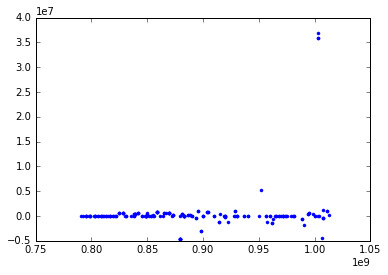

In [46]:
plot(df.res_f_0,df.res_Q_i,'.')

In [28]:
rmeas = basic.SingleSweep(streams)

In [29]:
rmeas.resonator.f_0

825117444.0256722

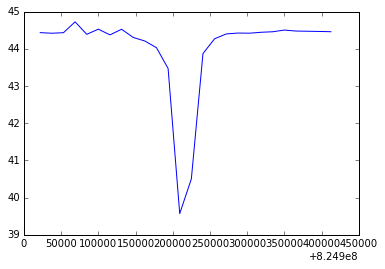

In [30]:
plot(rmeas.frequency,dB(rmeas.s21_point))

In [32]:
df = rmeas.to_dataframe()

In [ ]:
resonator_0_data = df[df.number==0]
plot(resonator_0_data.temperature,resonator_0_data.res_f_0,'.')
for k,row in resonator_0_data.iterrows():
    

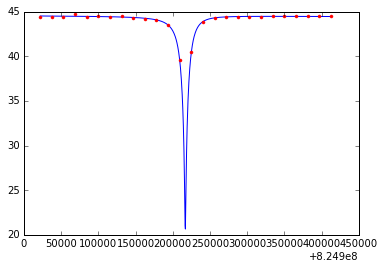

In [36]:
for k,row in df.iterrows():
    plot(row.res_model_frequency,dB(row.res_model_s21))
    plot(row.res_frequency_data,dB(row.res_s21_data),'r.')

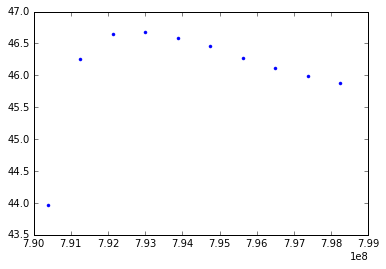

In [14]:
plot(sa.frequency[:10],dB(sa.s21_point)[:10],'.')

In [10]:
for streamarray in swa.stream_arrays

MeasurementList([<kid_readout.measurement.basic.StreamArray object at 0x7f84f8a4e410>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f890ce90>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f890cdd0>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888c110>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888c390>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888c610>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888c890>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888cb10>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f888cd90>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f889a050>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f889a2d0>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f889a550>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f889a7d0>, <kid_readout.measurement.basic.StreamArray object at 0x7f84f889aa50>, <ki